### Assignment 1

In [47]:
import monkdata as m
import dtree as d

monks = [m.monk1, m.monk2, m.monk3]

for i in monks:
    print(d.entropy(i))

1.0
0.957117428264771
0.9998061328047111


### Assignment 3

In [57]:
import monkdata as m
import dtree as d
from prettytable import PrettyTable

ig_table = PrettyTable(['Dataset', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6'])

for i in range(3):
    l = ["MONK-{0}".format(i+1)]
    for k in range(6):
      l.append(round(d.averageGain(monks[i], m.attributes[k]), 6))
    ig_table.add_row(l)

print(ig_table)


+---------+----------+----------+----------+----------+----------+----------+
| Dataset |    a1    |    a2    |    a3    |    a4    |    a5    |    a6    |
+---------+----------+----------+----------+----------+----------+----------+
|  MONK-1 | 0.075273 | 0.005838 | 0.004708 | 0.026312 | 0.287031 | 0.000758 |
|  MONK-2 | 0.003756 | 0.002458 | 0.001056 | 0.015664 | 0.017277 | 0.006248 |
|  MONK-3 | 0.007121 | 0.293736 | 0.000831 | 0.002892 | 0.255912 | 0.007077 |
+---------+----------+----------+----------+----------+----------+----------+


### Assignment 5

In [46]:
import monkdata as m
import dtree as d

data = [[m.monk1, m.monk1test], [m.monk2, m.monk2test], [m.monk3, m.monk3test]]

for i in data:
    t = d.buildTree(i[0], m.attributes)
    print(d.check(t, i[1]))



0.8287037037037037
0.6921296296296297
0.9444444444444444


In [3]:
import monkdata as m
import dtree as d

data = [[m.monk1, m.monk1test], [m.monk2, m.monk2test], [m.monk3, m.monk3test]]

for i in data:
    t = d.buildTree(i[0], m.attributes)
    print(t)

A5(+A4(A1(A2(+--)A2(-++)A2(--+))A2(-+-)A3(A1(A2(+--)+A2(-++))A2(--A1(--+))))A6(A4(A3(A1(A2(+--)A2(-+-)-)-)A1(A2(+--)--)-)A3(A4(A1(+--)A1(-++)+)A1(-A2(-+-)A2(--+))))A1(A2(+--)A2(-+-)A2(+-+)))
A5(A3(A6(-A1(-A2(--A4(--+))A2(-A4(-+-)-)))A4(A2(--A1(-+-))+A1(A2(-A6(-+)-)A2(A6(-+)++)+)))A3(A4(A2(-+-)A6(A1(--+)+)A1(A2(-++)++))A2(A4(++A1(+-A6(+-)))-A1(+A4(+--)-)))A3(A6(A1(-A4(-++)A4(--+))A2(+A1(+-A4(+--))A4(A1(-++)A1(+--)-)))A4(A2(A6(-+)A6(+-)A1(A6(-+)++))A1(A2(-+-)--)A1(A6(+-)--)))A2(A6(-A1(+-A4(++-)))A1(A4(-A3(-+)A3(A6(-+)A6(+-)))A3(+A6(+-))-)A3(A4(--+)-)))
A2(A5(++A4(A1(--+)++)-)A5(+A1(+A4(+-+)+)A3(A4(+A1(--+)A1(+--))+)-)A4(A5(--+A1(--+))--))


### Assignment 7

In [44]:
import matplotlib.pyplot as plt
import monkdata as m
import random as rnd
import dtree as dt
import numpy as np
from prettytable import PrettyTable

monks = [m.monk1, m.monk2, m.monk3]
monks_test = [m.monk1test, m.monk2test, m.monk3test]

In [34]:
def partition(data, fraction):
    ldata = list(data)
    rnd.shuffle(ldata)
    breakPoint = int(len(data) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

def prune_trees(data, test):
  fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
  pruned = []

  for fraction in fractions:
    train, validate = partition(data, fraction)
    tree = dt.buildTree(train, m.attributes)
    forest = dt.allPruned(tree)
    best_perf = dt.check(tree, validate)

    temp_tree = 0
    best_tree = tree

    for t in forest:
      temp_perf = dt.check(t, validate)
      if best_perf < temp_perf:
        best_perf = temp_perf
        best_tree = t

    pruned.append(1 - dt.check(best_tree, test))

  return pruned


In [39]:
def evaluate_pruning():
  fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
  monk1_pruned = []
  monk3_pruned = []


  for i in range(1000):
    monk1_pruned.append(prune_trees(m.monk1, m.monk1test))
    monk3_pruned.append(prune_trees(m.monk3, m.monk3test))

  monk1_pruned = np.transpose(monk1_pruned)
  monk3_pruned = np.transpose(monk3_pruned)

  mean1 = np.mean(monk1_pruned, axis=1)
  mean3 = np.mean(monk3_pruned, axis=1)
  std1 = np.std(monk1_pruned, axis=1)
  std3 = np.std(monk3_pruned, axis=1)

  stat_table = PrettyTable(['Dataset/Stat', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8'])
  stat_table.add_row(np.concatenate((['MONK-1 - MEAN'], np.around(mean1, decimals=6)), axis=0))
  stat_table.add_row(np.concatenate((['MONK-3 - MEAN'], np.around(mean3, decimals=6)), axis=0))
  stat_table.add_row(np.concatenate((['MONK-1 - STDEV'], np.around(std1, decimals=6)), axis=0))
  stat_table.add_row(np.concatenate((['MONK-1 - STDEV'], np.around(std3, decimals=6)), axis=0))
  print(stat_table)

  complete_tree1 = dt.buildTree(m.monk1, m.attributes)
  complete_tree3 = dt.buildTree(m.monk3, m.attributes)

  prn_table = PrettyTable(['Dataset', 'Error on Complete Tree', 'Error on Pruned Tree (mean)'])
  prn_table.add_row(['MONK-1', 1 - dt.check(complete_tree1, m.monk1test), np.amin(mean1)])
  prn_table.add_row(['MONK-3', 1 - dt.check(complete_tree3, m.monk3test), np.amin(mean3)])
  print(prn_table)

  plt.plot(fractions, mean1, color='b, marker='o', label="Means")
  plt.title("Mean Error vs Fractions on MONK-1")
  plt.xlabel("Fractions")
  plt.ylabel("Means of Error")
  plt.legend(loc='upper right', frameon=False)
  plt.show()

  plt.plot(fractions, mean3, color='r', marker='o', label="Means")
  plt.title("Mean Error vs Fractions on MONK-3")
  plt.xlabel("Fractions")
  plt.ylabel("Means of Error")
  plt.legend(loc='upper right', frameon=False)
  plt.show()


+----------------+----------+----------+----------+----------+----------+----------+
|  Dataset/Stat  |   0.3    |   0.4    |   0.5    |   0.6    |   0.7    |   0.8    |
+----------------+----------+----------+----------+----------+----------+----------+
| MONK-1 - MEAN  | 0.23013  | 0.205866 | 0.179449 | 0.16112  | 0.147375 | 0.138972 |
| MONK-3 - MEAN  | 0.091662 | 0.07035  | 0.061542 | 0.05412  | 0.052222 | 0.053731 |
| MONK-1 - STDEV | 0.042793 | 0.045081 | 0.045967 | 0.046635 | 0.04899  | 0.047248 |
| MONK-1 - STDEV | 0.057573 | 0.042566 | 0.035763 | 0.032381 | 0.028192 | 0.029701 |
+----------------+----------+----------+----------+----------+----------+----------+
+---------+------------------------+-----------------------------+
| Dataset | Error on Complete Tree | Error on Pruned Tree (mean) |
+---------+------------------------+-----------------------------+
|  MONK-1 |  0.17129629629629628   |     0.13897222222222216     |
|  MONK-3 |  0.05555555555555558   |      0.05222222

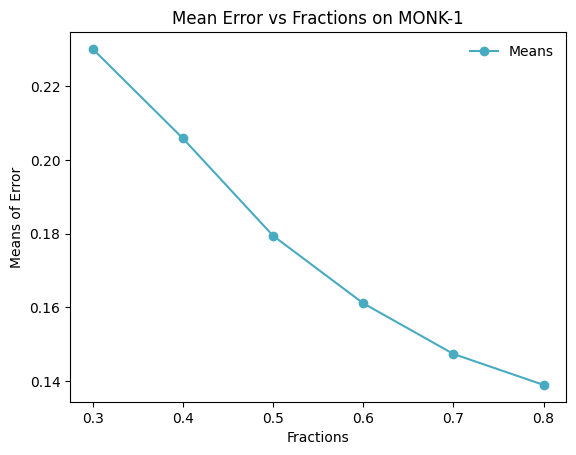

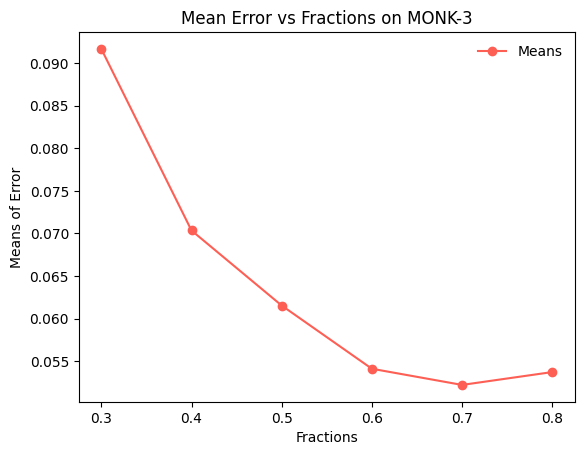

In [40]:
evaluate_pruning()